In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_excel("Project_data_2.xlsx")

In [7]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [10]:
dataset.shape

(9426, 24)

In [11]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [ ]:
# Filling the NULL Values

In [14]:
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(),inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_8844\1305928458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(),inplace=True)


In [15]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [17]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [19]:
dataset["Order Priority"] = dataset["Order Priority"].replace("Critical ","Critical")

In [20]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

# DATA ANALYSIS

In [22]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

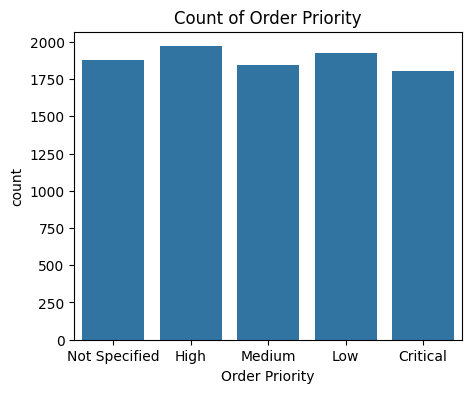

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# Customer Segment

<Axes: xlabel='Customer Segment', ylabel='count'>

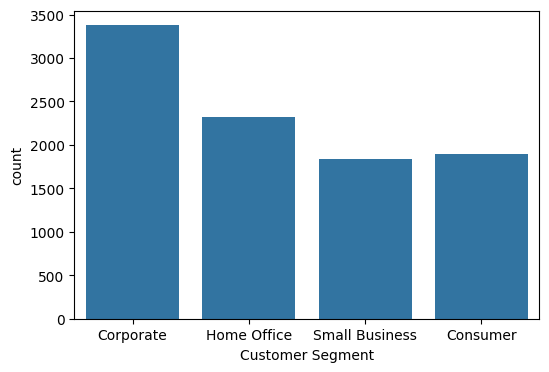

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)

# Product Category

<Axes: xlabel='Product Category', ylabel='count'>

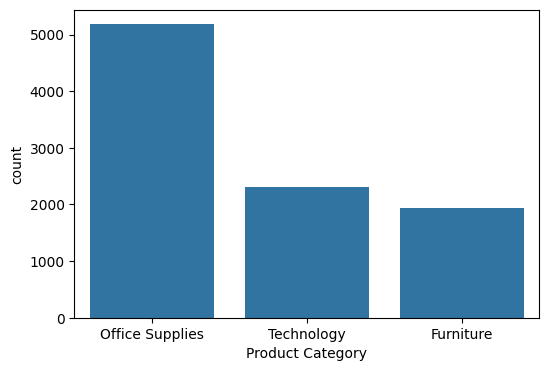

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset)

# Per Year Orders

In [101]:
dataset['Order year']=dataset['Order Date'].dt.year

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [104]:
dataset['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

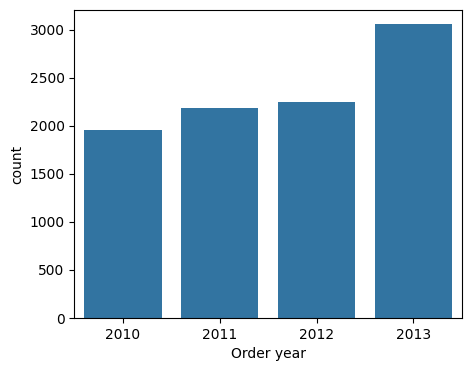

In [116]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order year',data=dataset)
plt.show()

#  SHIP MODE 

In [92]:
dataset.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523


In [35]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [36]:
dataset["Ship Mode"].unique()

array(['Regular Air', 'Express Air', 'Delivery Truck'], dtype=object)

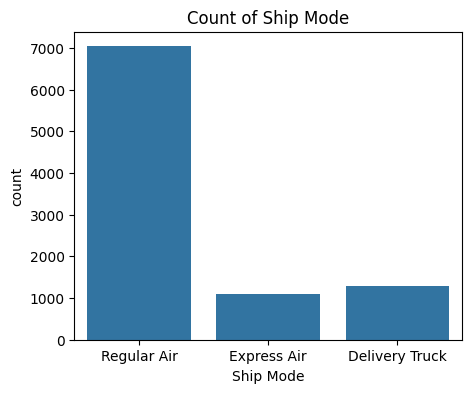

In [40]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset)
plt.title("Count of Ship Mode")
plt.show()

In [54]:
x = dataset["Ship Mode"].value_counts().index
y = dataset["Ship Mode"].value_counts().values


In [61]:
x

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [60]:
y

array([7036, 1283, 1107], dtype=int64)

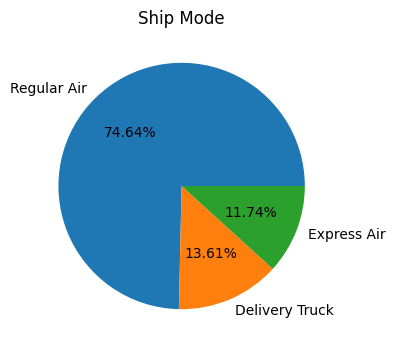

In [75]:
plt.figure(figsize=(5,4))
plt.title("Ship Mode")
plt.pie(y,labels=x,autopct="%0.2f%%")
plt.show()

In [ ]:
# Bivariate Analysis

<Axes: xlabel='Ship Mode', ylabel='count'>

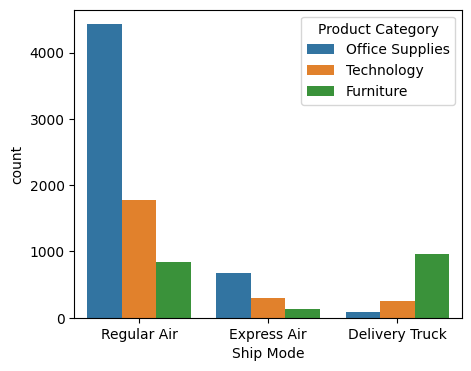

In [84]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")

In [118]:
dataset.head(1)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order year
0,18606,Not Specified,0.01,2.88,0.5,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.9,88525,2012


# Profit as per the Product Category

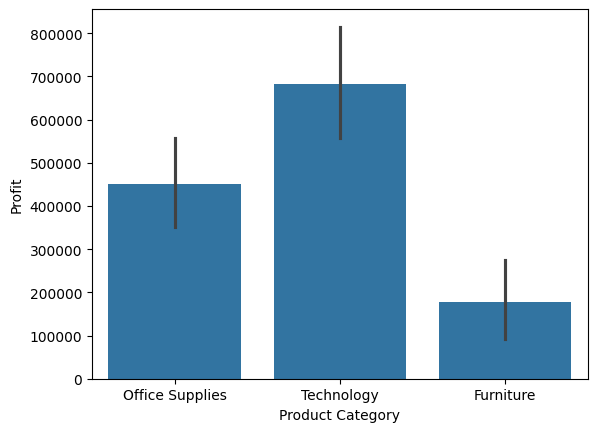

In [130]:
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.show()